# <p style="text-align: center;"> <b> Asking some meaningful questions about the data </b></p>
---

## Table of Contents


---

# 1. Introduction <a class="anchor" id="introduction"></a>

## 1.1 Requirements <a class="anchor" id="requirements"></a>

# 2. Implementation <a class="anchor" id="implementation"></a>

## Import libraries <a class="anchor" id="import_libraries"></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import re
from datetime import datetime
import datetime as dt
from collections import Counter
import warnings

# Tắt tất cả các cảnh báo
warnings.filterwarnings("ignore")

In [2]:
# pd.set_option('display.max_columns', None)
manga_df = pd.read_csv('../data/processed_comic.csv')
manga_df.head()

,Title,Score,Vote,Ranked,Popularity,Members,Favorite,Volumes,Chapters,Status,Genres,Author,Recommended,Mixed Feelings,Not Recommended,Release date,Time from release (months)
0,Berserk,9.47,331288,1,1,665300,122841,4.0,23.0,Publishing,"['Action', 'Adventure', 'Award Winning', 'Dram...",['Miura Kentarou Studio Gaga'],233,15,10,1989-08-25,411
1,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,9.30,156368,2,26,256146,42864,24.0,96.0,Finished,"['Action', 'Adventure', 'Mystery', 'Supernatur...",['Araki Hirohiko'],120,7,1,2004-01-19,87
2,Vagabond,9.24,136403,3,15,364891,40158,37.0,327.0,On Hiatus,"['Action', 'Adventure', 'Award Winning']",['Inoue Takehiko Yoshikawa Eiji'],88,8,1,1998-09-03,201
3,One Piece,9.22,366668,4,3,599278,114531,4.0,23.0,Publishing,"['Action', 'Adventure', 'Fantasy']",['Oda Eiichiro'],173,17,16,1997-07-22,316
4,Monster,9.15,93945,5,29,236355,20501,18.0,162.0,Finished,"['Award Winning', 'Drama', 'Mystery']",['Urasawa Naoki'],64,7,5,1994-12-05,84


In [3]:
manga_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6128 entries, 0 to 6127
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Title                       6128 non-null   object 
 1   Score                       6128 non-null   float64
 2   Vote                        6128 non-null   int64  
 3   Ranked                      6128 non-null   int64  
 4   Popularity                  6128 non-null   int64  
 5   Members                     6128 non-null   int64  
 6   Favorite                    6128 non-null   int64  
 7   Volumes                     6128 non-null   float64
 8   Chapters                    6128 non-null   float64
 9   Status                      6128 non-null   object 
 10  Genres                      6128 non-null   object 
 11  Author                      6128 non-null   object 
 12  Recommended                 6128 non-null   int64  
 13  Mixed Feelings              6128 

## Question 01 <a class="anchor" id="Question 01"></a>

+ Question 01: How does the number of chapters and volumes relate to the number of readers (`members`) and their engagement (`favorites`)?
+ Purpose: Understand the correlation between manga length and reader engagement.
+ Analysis: 
    + Calculate correlation coefficients between pairs (Chapters-Members, Volumes-Members, Chapters-Favorites, Volumes-Favorites)
    + Add trendlines to identify any patterns or correlations.

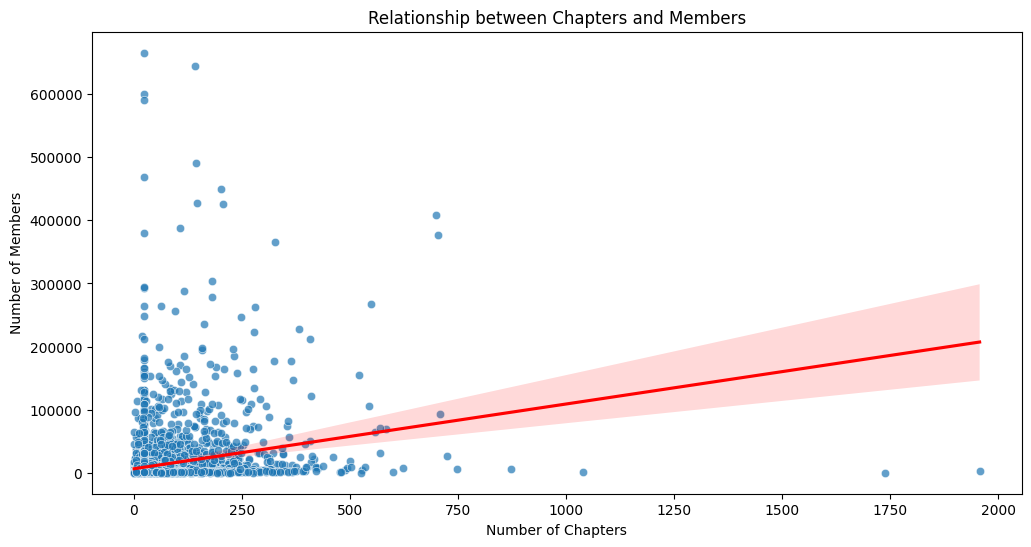

In [4]:
# Convert 'Volumes' and 'Chapters' columns to numeric (removing 'Unknown' values)
manga_df['Volumes'] = pd.to_numeric(manga_df['Volumes'], errors='coerce')
manga_df['Chapters'] = pd.to_numeric(manga_df['Chapters'], errors='coerce')
manga_df['Members'] = pd.to_numeric(manga_df['Members'], errors='coerce')  # Remove commas and convert to numeric
manga_df['Favorite'] = pd.to_numeric(manga_df['Favorite'], errors='coerce')  # Remove commas and convert to numeric

# Scatter plot for Chapters vs Members
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Chapters', y='Members', data=manga_df, alpha=0.7)
sns.regplot(x='Chapters', y='Members', data=manga_df, scatter=False, color='red')  # Add trendline
plt.title('Relationship between Chapters and Members')
plt.xlabel('Number of Chapters')
plt.ylabel('Number of Members')
plt.show()

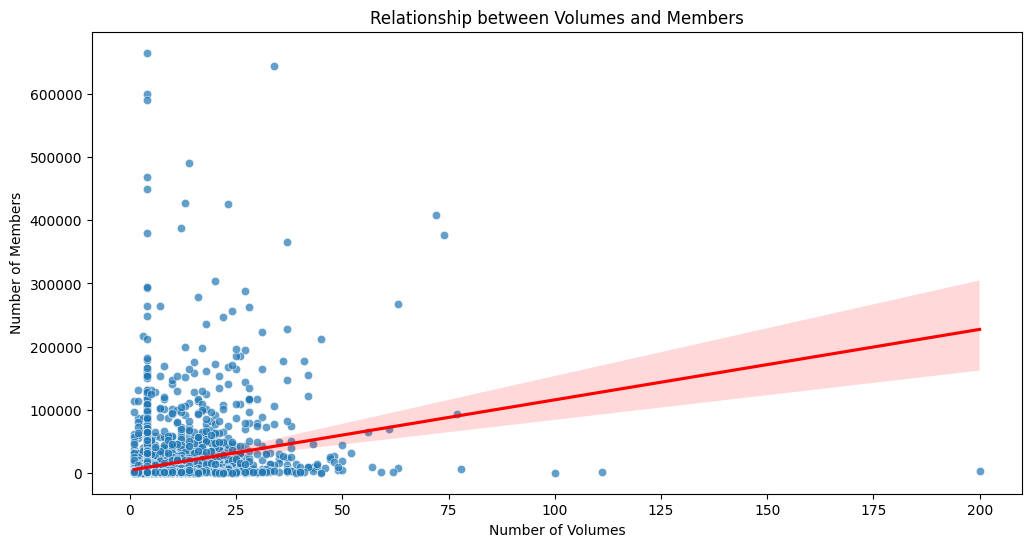

In [5]:
# Scatter plot for Volumes vs Members
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Volumes', y='Members', data=manga_df, alpha=0.7)
sns.regplot(x='Volumes', y='Members', data=manga_df, scatter=False, color='red')  # Add trendline
plt.title('Relationship between Volumes and Members')
plt.xlabel('Number of Volumes')
plt.ylabel('Number of Members')
plt.show()

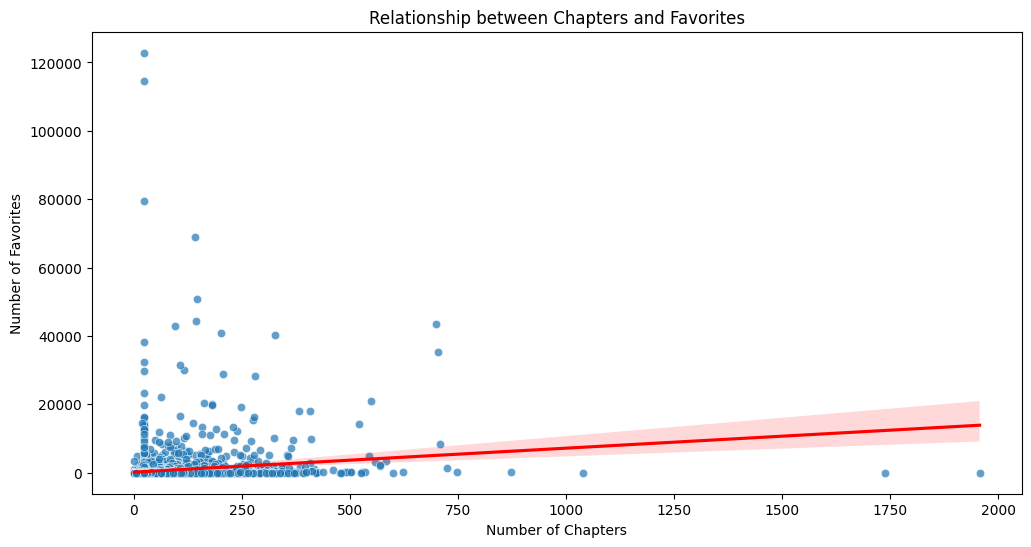

In [6]:
# Scatter plot for Chapters vs Favorites
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Chapters', y='Favorite', data=manga_df, alpha=0.7)
sns.regplot(x='Chapters', y='Favorite', data=manga_df, scatter=False, color='red')  # Add trendline
plt.title('Relationship between Chapters and Favorites')
plt.xlabel('Number of Chapters')
plt.ylabel('Number of Favorites')
plt.show()

## Question 02 <a class="anchor" id="Question 02"></a>

**Question 02:** Which authors have the highest average scores for their manga on MyAnimeList?
+ Purpose: Identify influential authors based on reader ratings.
+ Analysis:

Group the data by the "Author" column.
Calculate the average score for each author.
Visualize the top authors and their average scores using a bar chart.

## Question 03 <a class="anchor" id="Question 03"></a>

## Question 04 <a class="anchor" id="Question 04"></a>

## Question 05 <a class="anchor" id="Question 05"></a>

## Question 06 <a class="anchor" id="Question 06"></a>

## Question 07 <a class="anchor" id="Question 07"></a>

## Question 08 <a class="anchor" id="Question 08"></a>

+ Question 08: How has the number of manga releases changed over time, and does it follow any patterns (e.g., seasonal)?
+ Purpose: 
    - Understand the historical development of manga: Trace the growth of the manga industry from its early stages to the present day.
    - Gain insights into manga release cycles: Reveal patterns in manga releases, valuable for publishers, fans, and professionals for informed planning.
+ Analysis: 
    
    

In [8]:
df_copy = manga_df.copy()
df_copy['Release date'] = pd.to_datetime(df_copy['Release date'], errors='coerce')
# group by year and count the number of manga released in each year
df_copy['Year'] = df_copy['Release date'].dt.year.astype('Int64')
df_copy['Month'] = df_copy['Release date'].dt.month.astype('Int64')
df_copy['Decade'] = df_copy['Year'] // 10 * 10
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
df_copy['Season'] = pd.cut(df_copy['Month'], [0, 3, 6, 9, 12], labels=seasons, include_lowest=True)
df_copy[['Release date', 'Year', 'Month', 'Season', 'Decade']].head()

,Release date,Year,Month,Season,Decade
0,1989-08-25,1989,8,Fall,1980
1,2004-01-19,2004,1,Spring,2000
2,1998-09-03,1998,9,Fall,1990
3,1997-07-22,1997,7,Fall,1990
4,1994-12-05,1994,12,Winter,1990


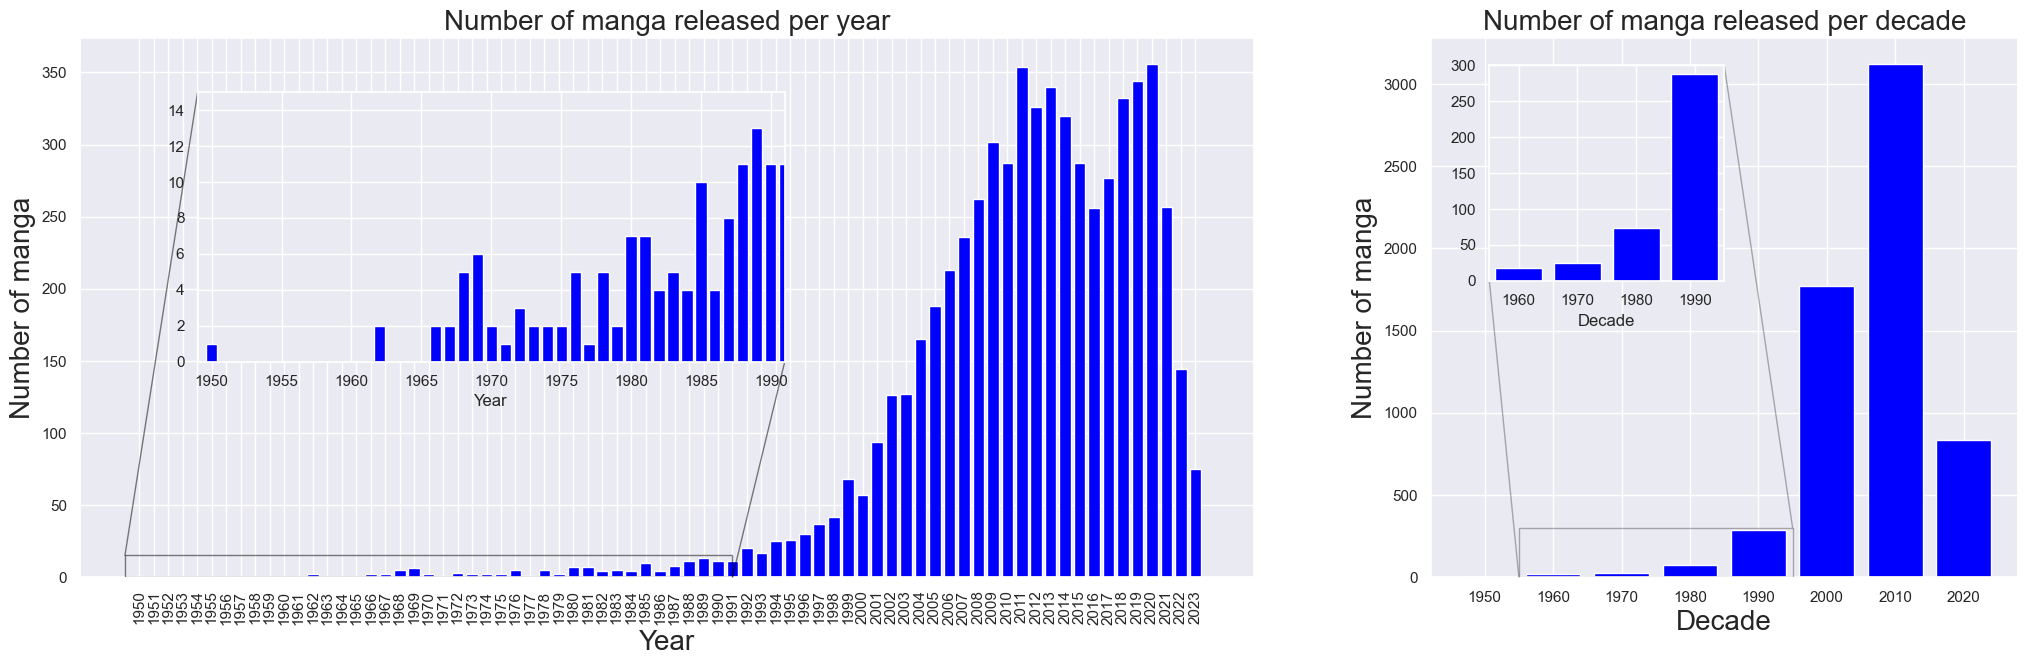

In [430]:
manga_per_year = df_copy.groupby('Year').size().reset_index(name='Count')
manga_per_decade = df_copy.groupby('Decade').size().reset_index(name='Count')
# Plotting the number of manga released per year and the number of manga released per decade
fig, axes = plt.subplots(1, 2, figsize=(25, 7), gridspec_kw={'width_ratios': [2, 1]})
sns.set_style('darkgrid')
axes[0].bar(manga_per_year['Year'], manga_per_year['Count'], color='blue')
axes[0].set_title('Number of manga released per year', fontsize=20)
axes[0].set_xlabel('Year', fontsize=20)
axes[0].set_ylabel('Number of manga', fontsize=20)
axes[0].set_xticks(range(1950, 2024, 1))
axes[0].set_xticklabels(range(1950, 2024, 1), rotation=90)



axin = axes[0].inset_axes([0.1, 0.4, 0.5, 0.5])
axin.bar(manga_per_year['Year'], manga_per_year['Count'], color='blue', width=0.8)
axin.set_xlim(1949, 1991)
axin.set_ylim(0, 15)
axin.set_xticks(range(1950, 1991, 5))
axin.set_xlabel('Year')
axin.set_ylabel('')


axes[0].indicate_inset_zoom(axin, edgecolor="black", linewidth=1, alpha=0.5)

axes[1].bar(manga_per_decade['Decade'], manga_per_decade['Count'], color='blue', width=8)
axes[1].set_title('Number of manga released per decade', fontsize=20)
axes[1].set_xlabel('Decade', fontsize=20)
axes[1].set_ylabel('Number of manga', fontsize=20)


axin = axes[1].inset_axes([0.1, 0.55, 0.4, 0.4])
axin.bar(manga_per_decade['Decade'], manga_per_decade['Count'], color='blue', width=8)
axin.set_xlim(1955, 1995)
axin.set_ylim(0, 300)
axin.set_xlabel('Decade')
axin.set_ylabel('')
axes[1].indicate_inset_zoom(axin, edgecolor="black", linewidth=1, alpha=0.3)

plt.show()


The two charts not only help us analyze the number of manga releases but also provide insights into the development of the Japanese manga industry:

- **Overview**: 

It is noticeable that the number of manga releases has been increasing over the years, but there has been a significant decrease in recent years (2020 onwards). The quantity of manga releases, as well as the development process of the Japanese manga industry, can be divided into several periods:

- **1950-1970: Early Stage**

Although there were manga works before this period in Japan, the dataset only has information from 1950. This period can be considered the inception of the Japanese manga industry, with a relatively limited number of manga releases, only a few mangas per year, with the highest being 6 mangas in 1969.

- **1970-1990: Initial Development**

During this period, the number of manga releases increased compared to the previous stage, indicating the beginning of the development of the Japanese manga industry. The quantity of manga releases gradually increased each year, around 7-8 mangas per year. This period also marked the time when the Japanese manga industry began to spread globally with works like Dragon Ball, Tsubasa, etc.

- **1990-2010: Strong Development**

This period witnessed a significant surge in the number of manga releases compared to the previous stage (from 10 mangas per year to over 200 mangas per year). It was also a time when the Japanese manga industry expanded globally with famous works such as Naruto, One Piece, Bleach, etc.

- **2010-present: Peak and Recent Decline**

This period saw the Japanese manga industry reaching its peak in terms of the quantity of manga releases, global popularity, and coverage, with over 300 mangas per year, reaching the pinnacle at 356 mangas in 2020. However, from 2020 onwards, possibly due to the heavy impact of the Covid-19 pandemic, the number of manga releases has significantly declined.




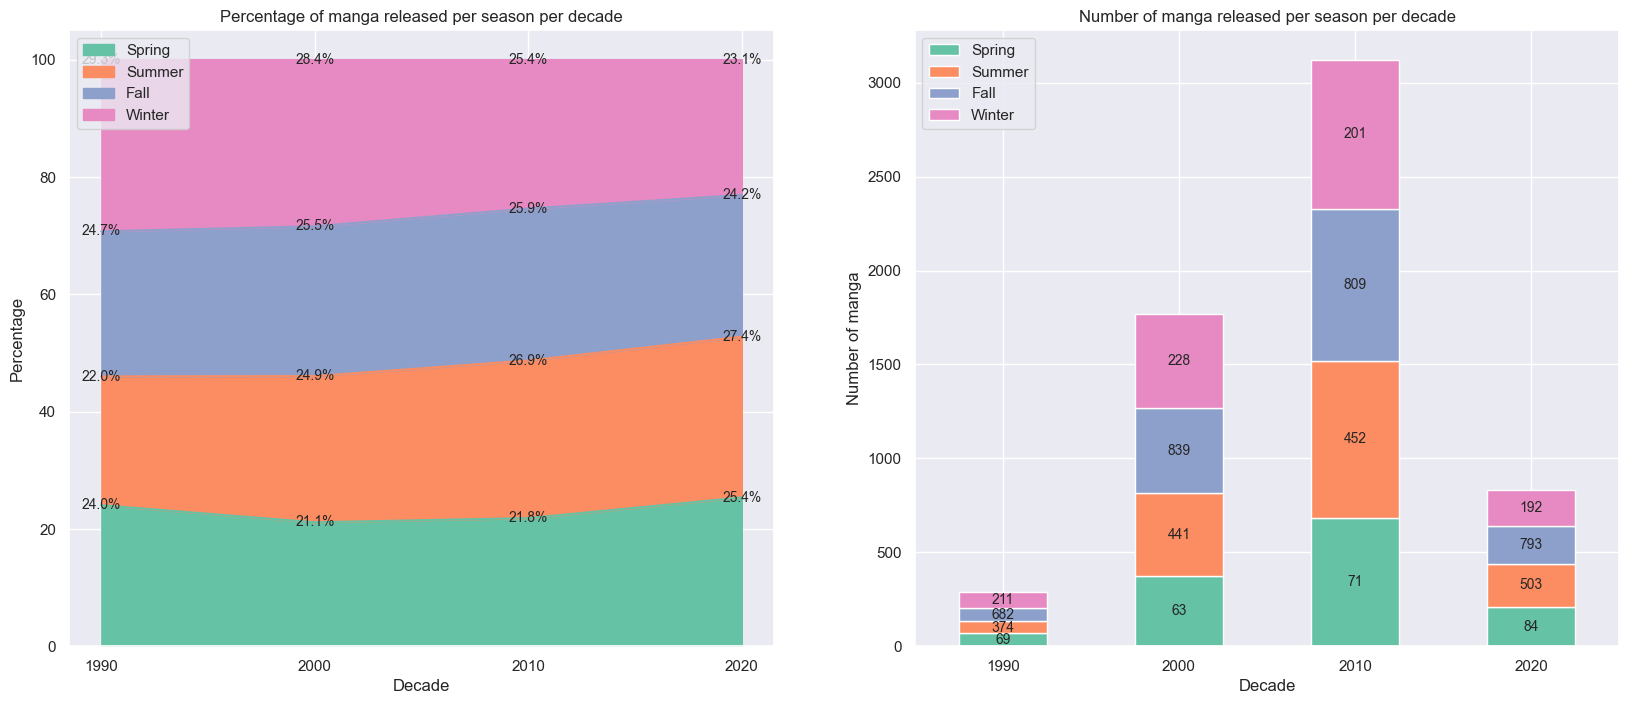

In [388]:
sns.set(style="darkgrid")
sns.set_palette("Set2")

manga_per_season = df_copy[df_copy['Year'] >= 1990].groupby(['Decade', 'Season']).size().reset_index(name='Count')
manga_per_season['Percentage'] = manga_per_season['Count'] / manga_per_season.groupby('Decade')['Count'].transform('sum') * 100

fig, ax = plt.subplots(1, 2, figsize=(20, 8))

manga_per_season.groupby(['Decade', 'Season'])['Percentage'].sum().unstack().plot(kind='area', stacked=True, ax=ax[0])
ax[0].set_title('Percentage of manga released per season per decade')
ax[0].set_xlabel('Decade')
ax[0].set_ylabel('Percentage')
ax[0].legend(loc='upper left')
ax[0].set_xticks(range(1990, 2030, 10))

manga_per_season.groupby(['Decade', 'Season'])['Count'].sum().unstack().plot(kind='bar', stacked=True, ax=ax[1])
ax[1].set_title('Number of manga released per season per decade')
ax[1].set_xlabel('Decade')
ax[1].set_ylabel('Number of manga')
ax[1].legend(loc='upper left')
ax[1].set_xticklabels(manga_per_season['Decade'].unique(), rotation=0)

for decade, row in manga_per_season.groupby('Decade'):
    if decade in ax[0].get_xticks():
        temp = 0
        for season, percentage in row.set_index('Season')['Percentage'].items():
            x_pos = decade
            temp += percentage
            y_pos = temp
            ax[0].text(x_pos, y_pos, f"{percentage:.1f}%", ha='center', va='center', fontsize=10)

bars = ax[1].patches
for bar, (index, decade, season, count) in zip(bars, manga_per_season[['Decade', 'Season', 'Count']].itertuples()):
    x_pos = bar.get_x() + bar.get_width() / 2
    y_pos = bar.get_y() + bar.get_height() / 2
    ax[1].text(x_pos, y_pos, f"{count:,}", ha='center', va='center', fontsize=10)

plt.show()


## Question 09 <a class="anchor" id="Question 09"></a>

+ **Question**: How are the `Genres` and preferences of readers?
+ **Purpose**: To determine which genres are popular among readers and to identify the genres for which readers give high voting scores.
+ **Analysis**: 
    + Calculate the top 5 genres with the highest popularity scores
    + Calculate the top 5 genres with the highest voting scores

**The number of times each genre appears in all comics**

In [ ]:
manga_copy_df = manga_df.copy()

listGenresColumns = manga_copy_df['Genres'].tolist()
listGenresColumns = [ast.literal_eval(listGenres) for listGenres in listGenresColumns]
listGenresColumns

genreCount = {}

genreCount = Counter(genre for listGenres in listGenresColumns for genre in listGenres)

df_genre_count = pd.DataFrame([genreCount.values()], columns=genreCount.keys())

df_genre_count = df_genre_count.rename(index={0: 'Count'})

df_genre_count

,Action,Adventure,Award Winning,Drama,Fantasy,Horror,Supernatural,Mystery,Sports,Slice of Life,Sci-Fi,Comedy,Romance,Ecchi,Suspense,Boys Love,Girls Love,Gourmet,Avant Garde
Count,1801,889,255,1866,1988,300,1323,556,144,938,597,2482,2518,397,113,285,207,78,4


In [ ]:
manga_copy_df['Genres'] = manga_copy_df['Genres'].apply(eval)
df_genres_expanded = manga_copy_df.explode('Genres').reset_index()

popular_genre = df_genres_expanded.groupby('Genres')['Popularity'].mean().sort_values(ascending=False).index[0:5]

score_genre = df_genres_expanded.groupby('Genres')['Score'].mean().sort_values(ascending=False).index[0:5]

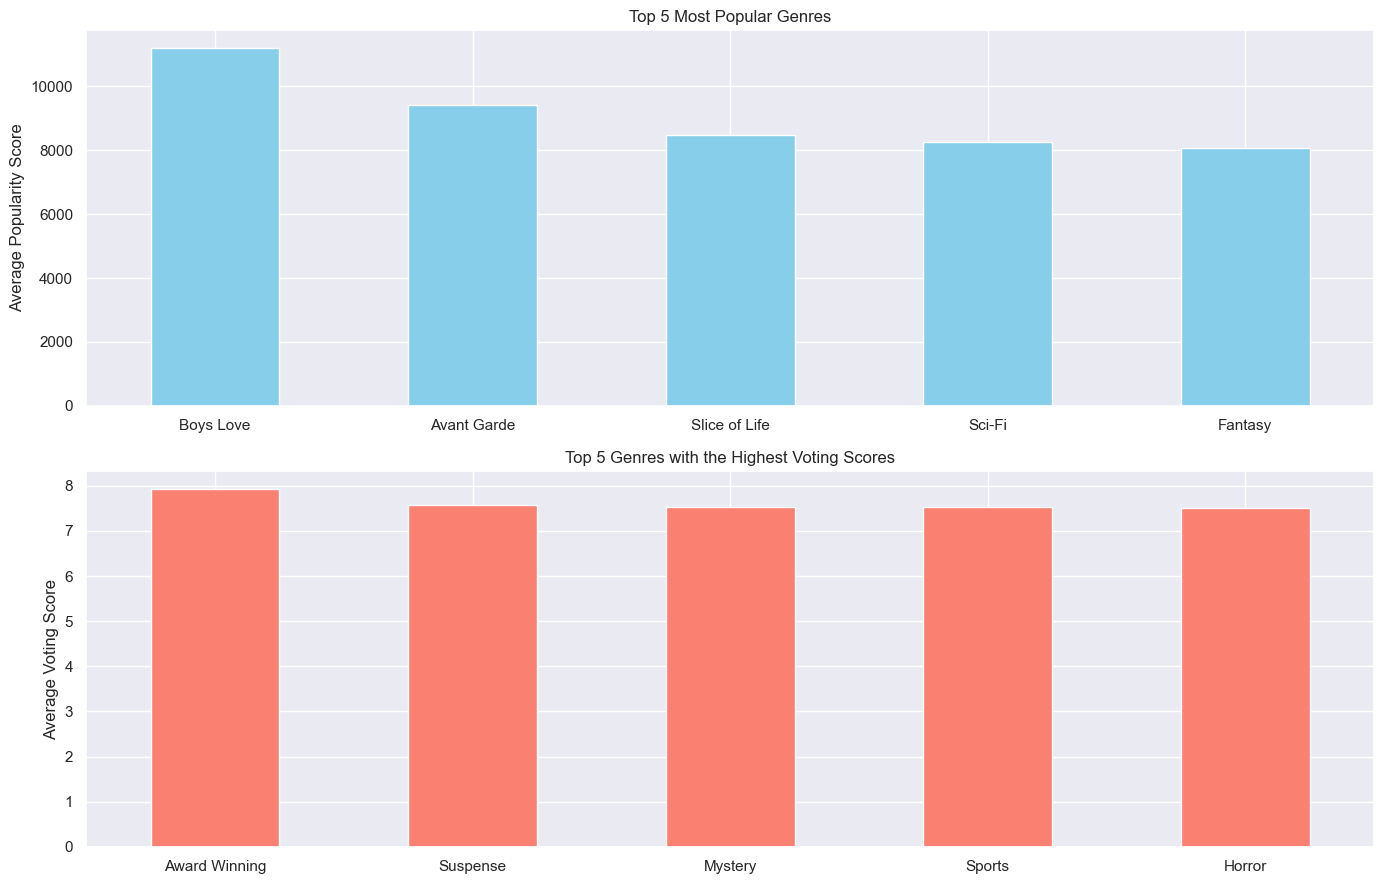

In [ ]:
popular_genre_data = df_genres_expanded[df_genres_expanded['Genres'].isin(popular_genre)]
popular_genre_data = popular_genre_data.groupby('Genres')['Popularity'].mean().sort_values(ascending=False)

score_genre_data = df_genres_expanded[df_genres_expanded['Genres'].isin(score_genre)]
score_genre_data = score_genre_data.groupby('Genres')['Score'].mean().sort_values(ascending=False)

fig, axes = plt.subplots(nrows=2, figsize=(14, 9))

popular_genre_data.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Top 5 Most Popular Genres')
axes[0].set_ylabel('Average Popularity Score')
axes[0].set_xlabel('')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

score_genre_data.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Top 5 Genres with the Highest Voting Scores')
axes[1].set_ylabel('Average Voting Score')
axes[1].set_xlabel('')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

## Question 10 <a class="anchor" id="Question 10"></a>

+ **Question**: The relationship between `Status` and variables such as the number of `Recommended` ratings and `Release date` ?
+ **Purpose**: 
    + Analyzing the relationship between `Status` and the number of `Recommended` ratings can provide information about the interest and positive feedback from the reader community.
    + Examining the relationship between `Status` and the `Release date` can help us better understand how an item develops over time. 
+ **Analysis**: 
    + Draw a box plot between `Status` and `Recommended`
    + Measure the correlation between `Status` and `Release date`

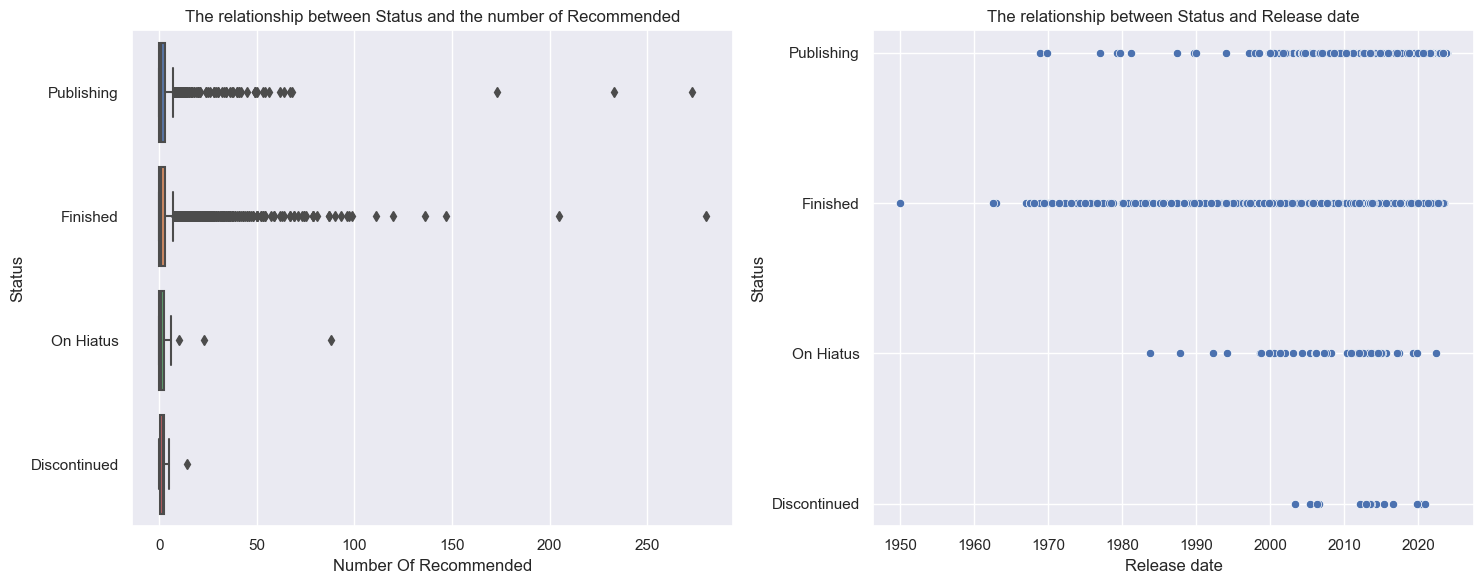

The correlation coefficient between Status and Release date: 0.3758344646893403


In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.boxplot(x='Recommended', y='Status', data=manga_copy_df, ax=axes[0])
axes[0].set_title('The relationship between Status and the number of Recommended')
axes[0].set_xlabel('Number Of Recommended')
axes[0].set_ylabel('Status')

sns.scatterplot(x='Release date', y='Status', data=manga_copy_df, ax=axes[1])
axes[1].set_title('The relationship between Status and Release date')
axes[1].set_xlabel('Release date')
axes[1].set_ylabel('Status')

plt.tight_layout()
plt.show()

correlation_status_time = manga_copy_df['Status'].astype('category').cat.codes.corr(manga_copy_df['Release date'])
print(f'The correlation coefficient between Status and Release date: {correlation_status_time}')